# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=metric&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | montevideo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nemuro
Processing Record 4 of Set 1 | bel ombre
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | phalodi
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | dondo
Processing Record 11 of Set 1 | arhavi
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | acarau
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | uryupinsk
Processing Record 18 of Set 1 | howrah
Processing Record 19 of Set 1 | bani suwayf
Processing Record 20 of Set 1 | khargone
Processing Record 21 of Set 1 | dakhla
Processing Record 22 of Set 1 | sonsorol village
Ci

Processing Record 40 of Set 4 | detroit lakes
Processing Record 41 of Set 4 | afaahiti
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | ritchie
Processing Record 44 of Set 4 | nagai
Processing Record 45 of Set 4 | votorantim
Processing Record 46 of Set 4 | egilsstadir
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | sitangkai
Processing Record 49 of Set 4 | chernomorskoye
Processing Record 0 of Set 5 | jalai nur
Processing Record 1 of Set 5 | lukolela
Processing Record 2 of Set 5 | tolanaro
Processing Record 3 of Set 5 | la passe
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | north bend
Processing Record 6 of Set 5 | askoy
Processing Record 7 of Set 5 | waddan
Processing Record 8 of Set 5 | concordia
Processing Record 9 of Set 5 | harper
Processing Record 10 of Set 5 | dedovichi
Processing Record 11 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 12 of Set 5 | okha
Processing Record 13 of Set 5 | pr

Processing Record 30 of Set 8 | yuryuzan'
Processing Record 31 of Set 8 | mossel bay
Processing Record 32 of Set 8 | metapan
Processing Record 33 of Set 8 | ouallam
Processing Record 34 of Set 8 | yaren
Processing Record 35 of Set 8 | wanning
Processing Record 36 of Set 8 | port saint john's
Processing Record 37 of Set 8 | san manuel
Processing Record 38 of Set 8 | piedecuesta
Processing Record 39 of Set 8 | nikolayevsk-on-amure
Processing Record 40 of Set 8 | uray
Processing Record 41 of Set 8 | sadjoavato
City not found. Skipping...
Processing Record 42 of Set 8 | kavieng
Processing Record 43 of Set 8 | khemisset
Processing Record 44 of Set 8 | lake havasu city
Processing Record 45 of Set 8 | eureka
Processing Record 46 of Set 8 | caleta de carquin
Processing Record 47 of Set 8 | santa cruz
Processing Record 48 of Set 8 | tanki leendert
City not found. Skipping...
Processing Record 49 of Set 8 | santiago de cuba
Processing Record 0 of Set 9 | san pedro
Processing Record 1 of Set 9 | 

Processing Record 19 of Set 12 | luwuk
Processing Record 20 of Set 12 | divnoye
Processing Record 21 of Set 12 | sungurlu
Processing Record 22 of Set 12 | campbell river
Processing Record 23 of Set 12 | brookings
Processing Record 24 of Set 12 | zyryanskoye
Processing Record 25 of Set 12 | fuling
Processing Record 26 of Set 12 | tindouf
Processing Record 27 of Set 12 | myrina
Processing Record 28 of Set 12 | huayin
Processing Record 29 of Set 12 | nyaunglebin
Processing Record 30 of Set 12 | xique xique
Processing Record 31 of Set 12 | hassi messaoud
Processing Record 32 of Set 12 | binuangan
Processing Record 33 of Set 12 | nizhniy odes
Processing Record 34 of Set 12 | aqsay
Processing Record 35 of Set 12 | remire-montjoly
Processing Record 36 of Set 12 | buchach
Processing Record 37 of Set 12 | balabac
Processing Record 38 of Set 12 | abepura
Processing Record 39 of Set 12 | nogliki
Processing Record 40 of Set 12 | tselinnoye
Processing Record 41 of Set 12 | tangalle
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,montevideo,-34.8335,-56.1674,16.57,100,100,5.14,UY,1699663741
1,ushuaia,-54.8000,-68.3000,5.81,71,100,7.20,AR,1699663624
2,nemuro,43.3236,145.5750,4.51,64,45,10.67,JP,1699663806
3,bel ombre,-4.6167,55.4167,27.91,78,40,2.06,SC,1699663806
4,ribeira grande,38.5167,-28.7000,20.43,96,17,6.71,PT,1699663806


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,montevideo,-34.8335,-56.1674,16.57,100,100,5.14,UY,1699663741
1,ushuaia,-54.8000,-68.3000,5.81,71,100,7.20,AR,1699663624
2,nemuro,43.3236,145.5750,4.51,64,45,10.67,JP,1699663806
3,bel ombre,-4.6167,55.4167,27.91,78,40,2.06,SC,1699663806
4,ribeira grande,38.5167,-28.7000,20.43,96,17,6.71,PT,1699663806


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

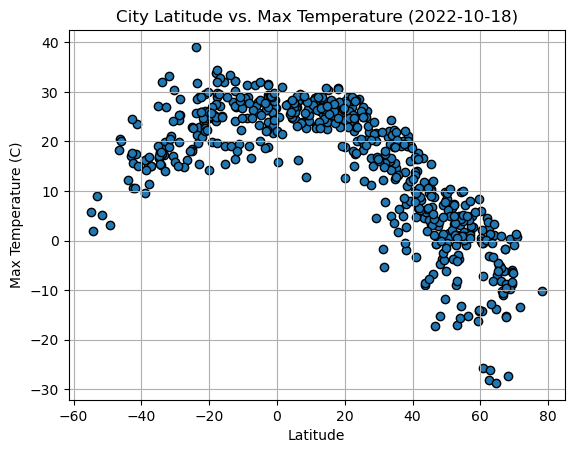

In [8]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values_temp = city_data_df['Max Temp']
plt.scatter(x_values, y_values_temp, marker="o", edgecolors="black")

plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

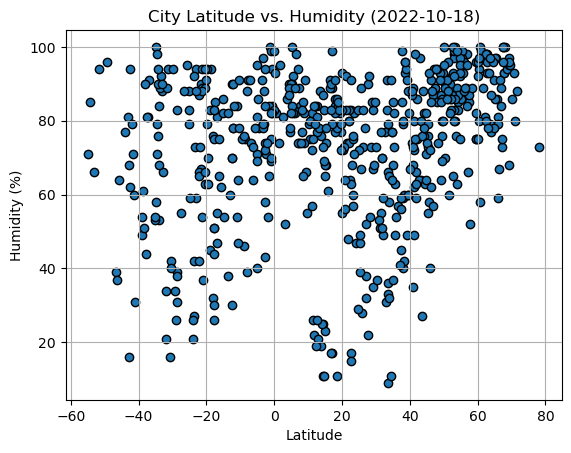

In [9]:
# Build the scatter plots for latitude vs. humidity

y_values_humid = city_data_df['Humidity']
plt.scatter(x_values, y_values_humid, marker="o", edgecolors="black")

plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

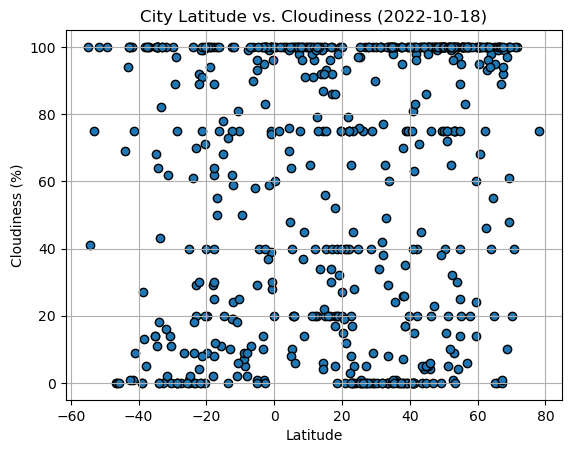

In [10]:
# Build the scatter plots for latitude vs. cloudiness

y_values_cloud = city_data_df['Cloudiness']
plt.scatter(x_values, y_values_cloud, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

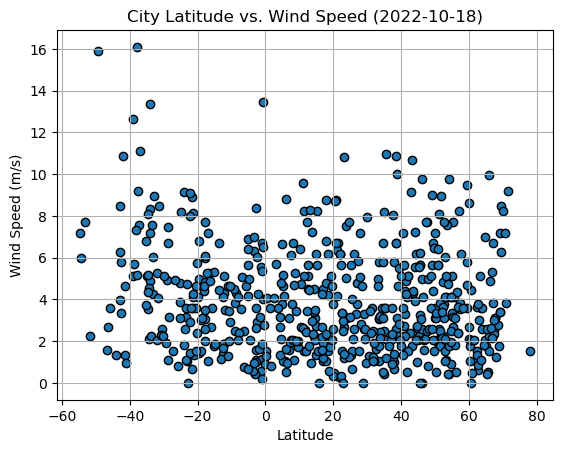

In [11]:
# Build the scatter plots for latitude vs. wind speed

y_values_wind = city_data_df['Wind Speed']
plt.scatter(x_values, y_values_wind, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_val, y_val, x_label, y_label, line_x_axis, line_y_axis):
    slope, intercept, r, p, std_err = linregress(x_val, y_val)
    fit = slope * x_val + intercept

    plt.scatter(x_val, y_val)
    plt.plot(x_val, fit, "r-")
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (line_x_axis, line_y_axis), fontsize = 15, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value is: {r}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
north_x_value = northern_hemi_df["Lat"]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nemuro,43.3236,145.5750,4.51,64,45,10.67,JP,1699663806
4,ribeira grande,38.5167,-28.7000,20.43,96,17,6.71,PT,1699663806
6,phalodi,27.1333,72.3667,20.62,52,0,3.76,IN,1699663807
7,college,64.8569,-147.8028,-7.03,91,100,2.06,US,1699663807
10,arhavi,41.3492,41.3069,13.95,62,63,4.27,TR,1699663808


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
south_x_value = southern_hemi_df["Lat"]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,montevideo,-34.8335,-56.1674,16.57,100,100,5.14,UY,1699663741
1,ushuaia,-54.8000,-68.3000,5.81,71,100,7.20,AR,1699663624
3,bel ombre,-4.6167,55.4167,27.91,78,40,2.06,SC,1699663806
5,adamstown,-25.0660,-130.1015,22.87,79,1,4.77,PN,1699663807
8,edinburgh of the seven seas,-37.0676,-12.3116,15.00,91,100,11.12,SH,1699663705


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8712580502642412


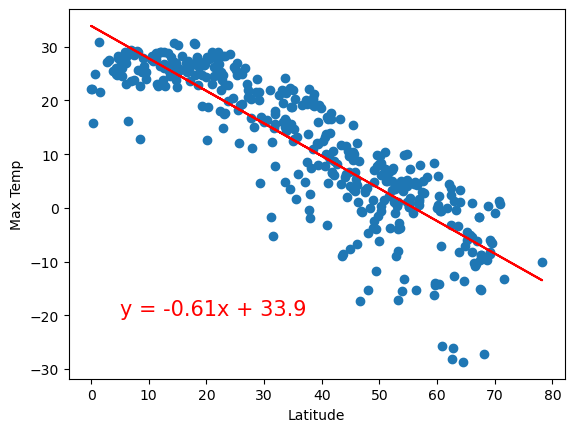

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(north_x_value, northern_hemi_df["Max Temp"], "Latitude", "Max Temp", 5, -20)


The r-value is: 0.6264894096736222


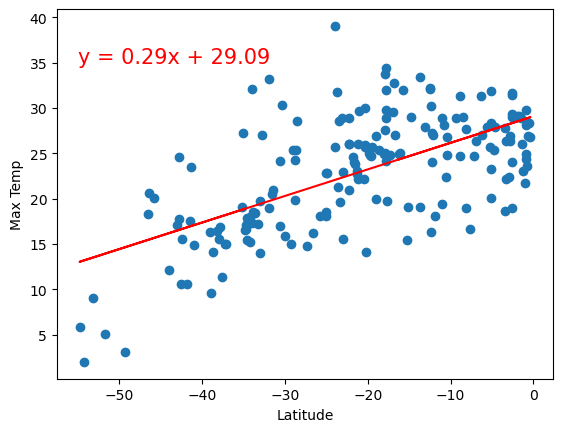

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(south_x_value, southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -55, 35)


**Discussion about the linear relationship:** 
In northern hemisphere, latitude of the cities have strong negative correlation relationship with their max. temperatures. As the latitude of cities increases, that is their location moves away from equator (latitude 0), the maximum temperature recorded in the cities reduces.

However, in southern hemisphere, latitude of the cities have a positive correlation relationship with their max. temperatures. As the latitude of cities increases, that is as the location of the cities move towards equator (latitude 0), the maximum temperature recorded in the cities increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.29909258994361226


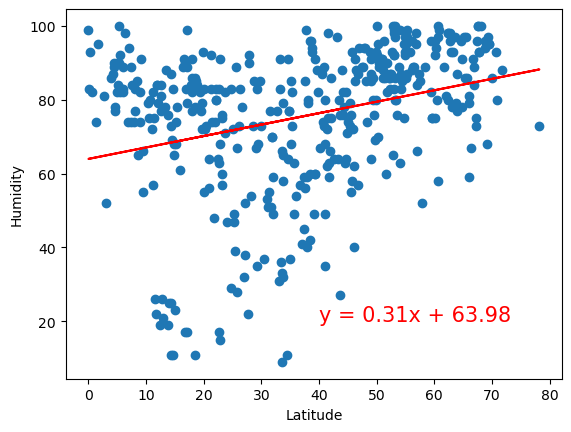

In [17]:
# Northern Hemisphere
plot_linear_regression(north_x_value, northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 20)


The r-value is: 0.1482690083209754


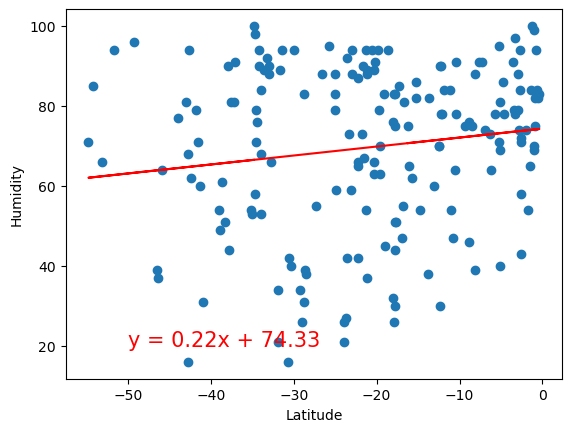

In [18]:
# Southern Hemisphere
plot_linear_regression(south_x_value, southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20)


**Discussion about the linear relationship:** 
Cities in both Northern and Southern Hemisphere have very low positive correlation between their location (latitude) and humidity experienced by them. There is no significant relationship between location and humidity% of the cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1399063156035376


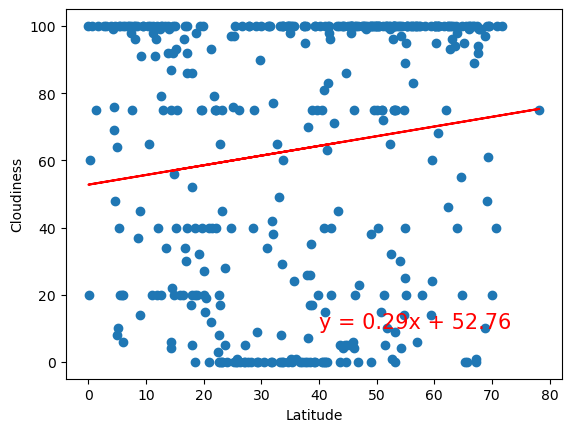

In [19]:
# Northern Hemisphere
plot_linear_regression(north_x_value, northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 40, 10)


The r-value is: 0.06513790446654949


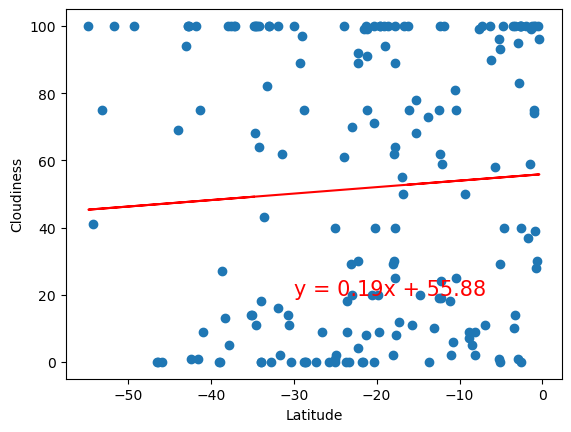

In [20]:
# Southern Hemisphere
plot_linear_regression(south_x_value, southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -30, 20)


**Discussion about the linear relationship:** 
Like Humidity, Cloudiness of a city also does not have any significant relationship with latitude of the city in both Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04031391103831727


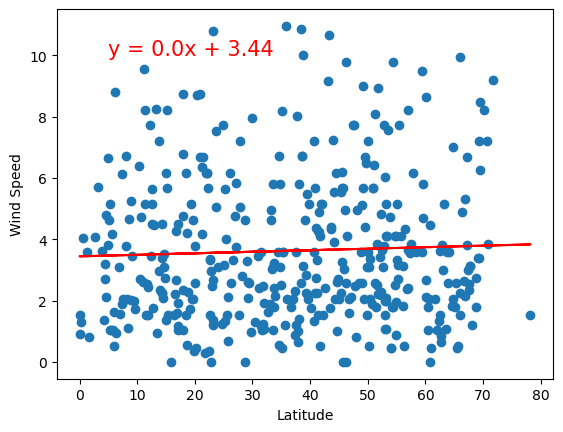

In [21]:
# Northern Hemisphere
plot_linear_regression(north_x_value, northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 5, 10)


The r-value is: -0.29710573170977245


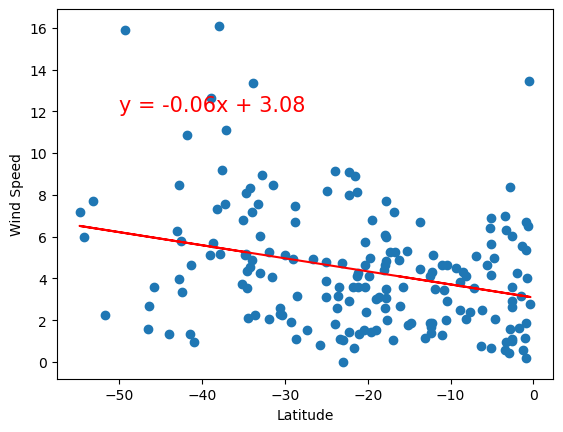

In [22]:
# Southern Hemisphere
plot_linear_regression(south_x_value, southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 12)


**Discussion about the linear relationship:** 
Wind Speed, like humidity and cloudiness, is not impacted much by location of the city in both Northern and Southern Hemisphere.